In [1]:
import pandas as pd
import matplotlib.pyplot as plt

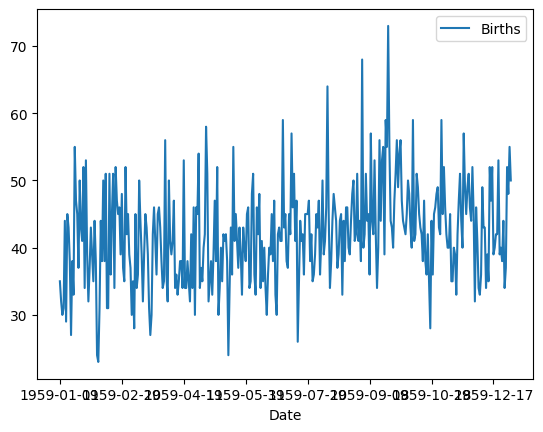

In [2]:
series = pd.read_csv('/content/daily-total-female-births.csv', header = 0, index_col=0)
series.plot()
plt.show()

This is a stationary time series where there is no seasonality, trends or other structures

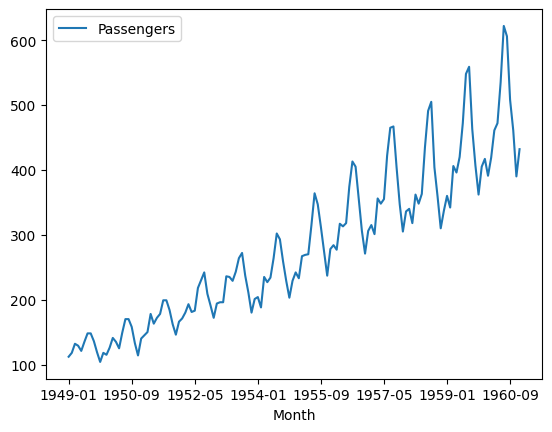

In [3]:
s2 = pd.read_csv('/content/airline-passengers.csv', header=0, index_col=0)
s2.plot()
plt.show()

This is a non-stationary tine series with trends or seasonal effects.
Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

# **Summary Statistics**

You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

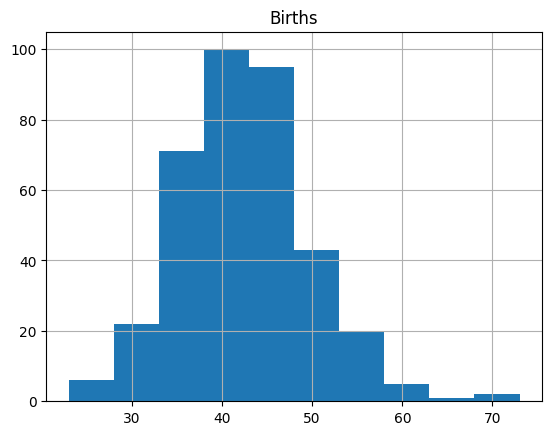

In [5]:
series.hist()
plt.show()

In [6]:
X = series.values
split = round(len(X) / 2)
x1, x2 = X[0:split], X[split:]
m1, m2 = x1.mean(), x2.mean()

v1, v2 = x1.var(), x2.var()
print("mean1=%f, mean2=%f" % (m1, m2))
print('variance1=%f variance2=%f' %(v1, v2))

mean1=39.763736, mean2=44.185792
variance1=49.213410 variance2=48.708651


In [7]:
X = s2.values
split = round(len(X) / 2)
x1, x2 = X[0:split], X[split:]
m1, m2 = x1.mean(), x2.mean()

v1, v2 = x1.var(), x2.var()
print("mean1=%f, mean2=%f" % (m1, m2))
print('variance1=%f variance2=%f' %(v1, v2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770 variance2=7367.962191


array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

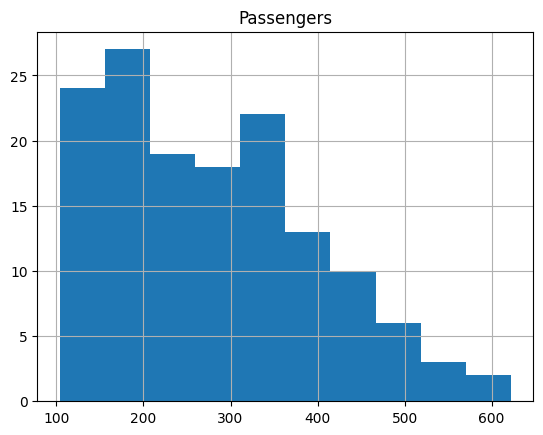

In [8]:
s2.hist()

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing.

This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <BarContainer object of 10 artists>)

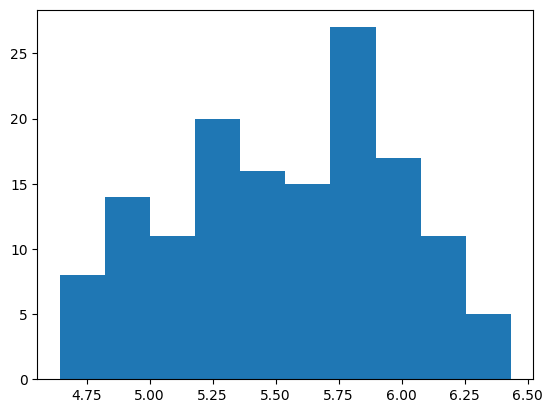

In [11]:
import numpy as np
X2 = s2.values
X2 = np.log(X2)
plt.hist(X2)

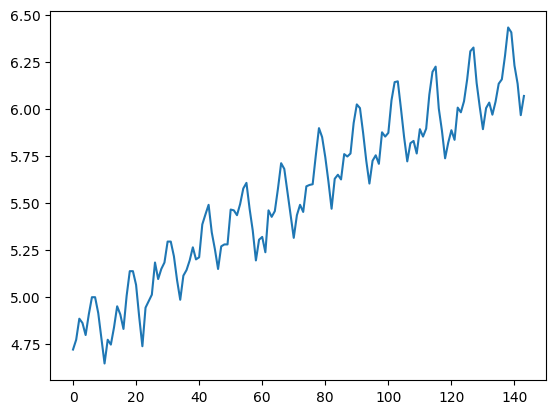

In [12]:
plt.plot(X2)

the log transformed data and can see the exponential growth seems diminished, but we still have a trend and seasonal elements.

In [13]:
#X = series.values
split = round(len(X2) / 2)
x1, x2 = X2[:split], X2[split:]
m1, m2 = x1.mean(), x2.mean()

v1, v2 = x1.var(), x2.var()
print("mean1=%f, mean2=%f" % (m1, m2))
print('variance1=%f variance2=%f' %(v1, v2))

mean1=5.175146, mean2=5.909206
variance1=0.068375 variance2=0.049264


The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [15]:
from statsmodels.tsa.stattools import adfuller
X = series.values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: % .3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [16]:
X = s2.values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: % .3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Running the example gives a different picture than the above. The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

In [17]:
result = adfuller(X2)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: % .3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [18]:
result

(-1.7170170891069683,
 0.4223667747703874,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

Running the example shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.